In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from model_training import *
import yaml
from benchmark import *
import pandas as pd
from new_etl import *
import seaborn as sns

In [3]:
data = {
    
}
class data_test:
    def __init__(self, path):
        self.etl = covid_etl(path)
        self.df = self.etl.do()
        self.df_x = self.df[["total_cases", "new_cases", "total_deaths",
       "reproduction_rate", "total_tests", "new_tests", "positive_rate",
       "tests_per_case", 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day']]
        self.df_y = self.df[['new_deaths']]
    def split_data(self):
        x_train, x_test, y_train, y_test = train_test_split(self.df_x, self.df_y, test_size=0.3, random_state=66)
        return x_train, x_test, y_train, y_test
    def scaled_data(self):
        x_train, x_test, y_train, y_test = self.split_data()
        scaler_x = StandardScaler()
        scaler_y = StandardScaler()
        
        x_train = scaler_x.fit_transform(x_train)
        x_test = scaler_x.transform(x_test)
        
        y_train = scaler_y.fit_transform(y_train)
        y_test = scaler_y.transform(y_test)
        return x_train, x_test, y_train, y_test, scaler_y

In [4]:
with open('regression-training-ex-1.yaml', 'r') as yaml_file:
    cfg = yaml.load(yaml_file)

<ipython-input-4-51a61f71400a>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(yaml_file)


In [5]:
dt = data_test('/usr/src/covid_prediction/our-world-in-data-covid19-dataset/owid-covid-data.csv')
x_train, x_test, y_train, y_test, scaler_y = dt.scaled_data()

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


In [6]:
trainer_rf = training(cfg, 'RandomForestRegressor')
rf = trainer_rf.run()
data['rf'] = rf.score(x_test, y_test)

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


/usr/src/covid_prediction/benchmark.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(x_train, y_train)


In [7]:
trainer_svr = training(cfg, 'SVR')
svr = trainer_svr.run()
data['svr'] = svr.score(x_test, y_test)

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [8]:
trainer_gbr = training(cfg, 'GBR')
gbr = trainer_gbr.run()
data['gbr'] = gbr.score(x_test, y_test)

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
trainer_xgb = training(cfg, 'XG')
xgb = trainer_xgb.run()
data['xgb'] = xgb.score(x_test, y_test)

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'total_tests', 'new_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'year', 'month', 'day'],
      dtype='object')


In [10]:
data

{'rf': 0.9573246443311582,
 'svr': 0.9205490906631524,
 'gbr': 0.9389397482830038,
 'xgb': 0.9409202304086677}

In [11]:
df = pd.DataFrame(
    {
        'model' : list(data.keys()),
        'score' : list(data.values())
    }
)

In [12]:
df = df.sort_values(by=['score'], ascending=False)
df = df.reset_index()

<AxesSubplot:xlabel='model', ylabel='score'>

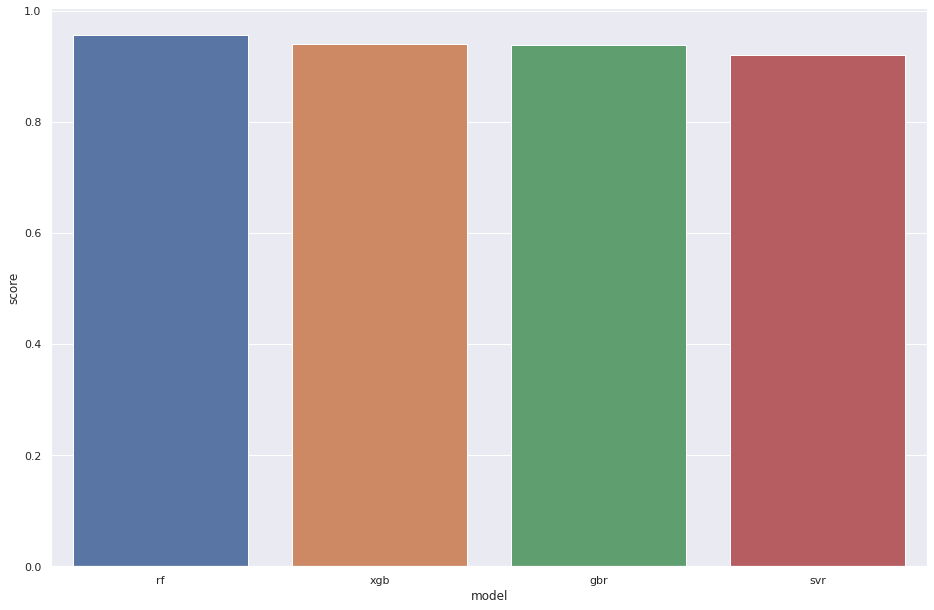

In [20]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.barplot(x='model', y='score', data=df)

In [14]:
df

,index,model,score
0,0,rf,0.957325
1,3,xgb,0.940920
2,2,gbr,0.938940
3,1,svr,0.920549
